# Assignment 9: Unsupervised Learning [_/100 Marks]

### <span style="color:red">As we approach the final exam, this last assignment can serve as an indicator of your coding readiness. I urge you to tackle this assignment independently and perhaps in a self-timed setup, without relying on AI tools or seeking assistance from friends. This is a chance for you to assess your own capabilities and ensure that you're prepared for the challenges ahead. By completing this task on your own, you'll gain valuable insights into your strengths and areas for improvement, which will ultimately benefit you in the final exam.</span>

### Once you are finished, ensure to complete the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

---
## Question 1 - <span style="color:green">[100]</span>

You are going to use unsupervised techniques to identify and label the unknown cells in the data set `A9_data.csv` based on the few known cells.

---
### <span style="color:orange">Data Dictionary</span>

The given dataset, `A9_data.csv`, lists certain geometrical characteristics of different cells (each row represents one sample, *i.e.*, a cell) and has the following attributes:

|Column Index| Attribute | Description |
| --- | --- | --- |
|0|`cell_feature_1`|Some measurement pertaining to cell shape (numerical attribute).|
|1|`cell_feature_2`|Some measurement pertaining to cell shape (numerical attribute).|
|2|`cell_feature_3`|Some measurement pertaining to cell shape (numerical attribute).|
|3|`cell_feature_4`|Some measurement pertaining to cell shape (numerical attribute).|
|4|`cell_feature_5`|Some measurement pertaining to cell shape (numerical attribute).|
|5|`cell_feature_6`|Some measurement pertaining to cell shape (numerical attribute).|
|6|`cell_type`|Type of cell (categorical attribute).|


---
### <span style="color:orange">Toolbox</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as prep
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

seed = 1151 # work with this seed throughout your work
np.random.seed(seed)
sns.set_palette('Spectral')
sns.set_style('darkgrid')


### Q1.1 - <span style="color:red">[10]</span> - Load the dataset as a pandas dataframe and name it `dfc`. Display the first five rows of `dfc`. How many observations are there in `dfc` and for how many of them the cell type is known? Name the known cell types. Then, create a copy of `dfc` and name it `data` and drop the attribute "cell_type" from `data`.

In [2]:
dfc = pd.read_csv("A9_data.csv")
display(dfc.head())

print(f"There are {dfc.shape[0]} observations in data")

display(dfc.value_counts(dfc["cell_type"]))
print(
    "The cell type is known for 4 observations of these 1200 total observations and these types are A, B, C, D with the rest labelled as unknown"
)

data = dfc.drop("cell_type", axis=1).copy()

,cell_feature_1,cell_feature_2,cell_feature_3,cell_feature_4,cell_feature_5,cell_feature_6,cell_type
0,-8.969499,-6.294874,-0.609292,-0.538988,3.045112,3.944128,D
1,3.559447,-8.800391,-9.503687,3.743288,-5.254547,-0.528753,unknown
2,4.198048,-7.418047,-8.449960,3.376891,-7.041192,0.586114,unknown
3,-1.580189,4.640504,-3.702296,7.572398,6.572311,-2.315348,unknown
4,-1.762427,5.716517,-3.511441,9.449469,6.463332,-3.510625,unknown


There are 1200 observations in data


cell_type
unknown    1196
A             1
B             1
C             1
D             1
Name: count, dtype: int64

The cell type is known for 4 observations of these 1200 total observations and these types are A, B, C, D with the rest labelled as unknown


### Q1.2 - <span style="color:red">[10]</span> - Use `seaborn.pairplot` to investigate pairwise relationships in the dataframe `data`. Could we use this plots to reliably say how many clusters are there in the data? Why?

Hint: You could set the argument `corner` to `True` to speed up the plotting.

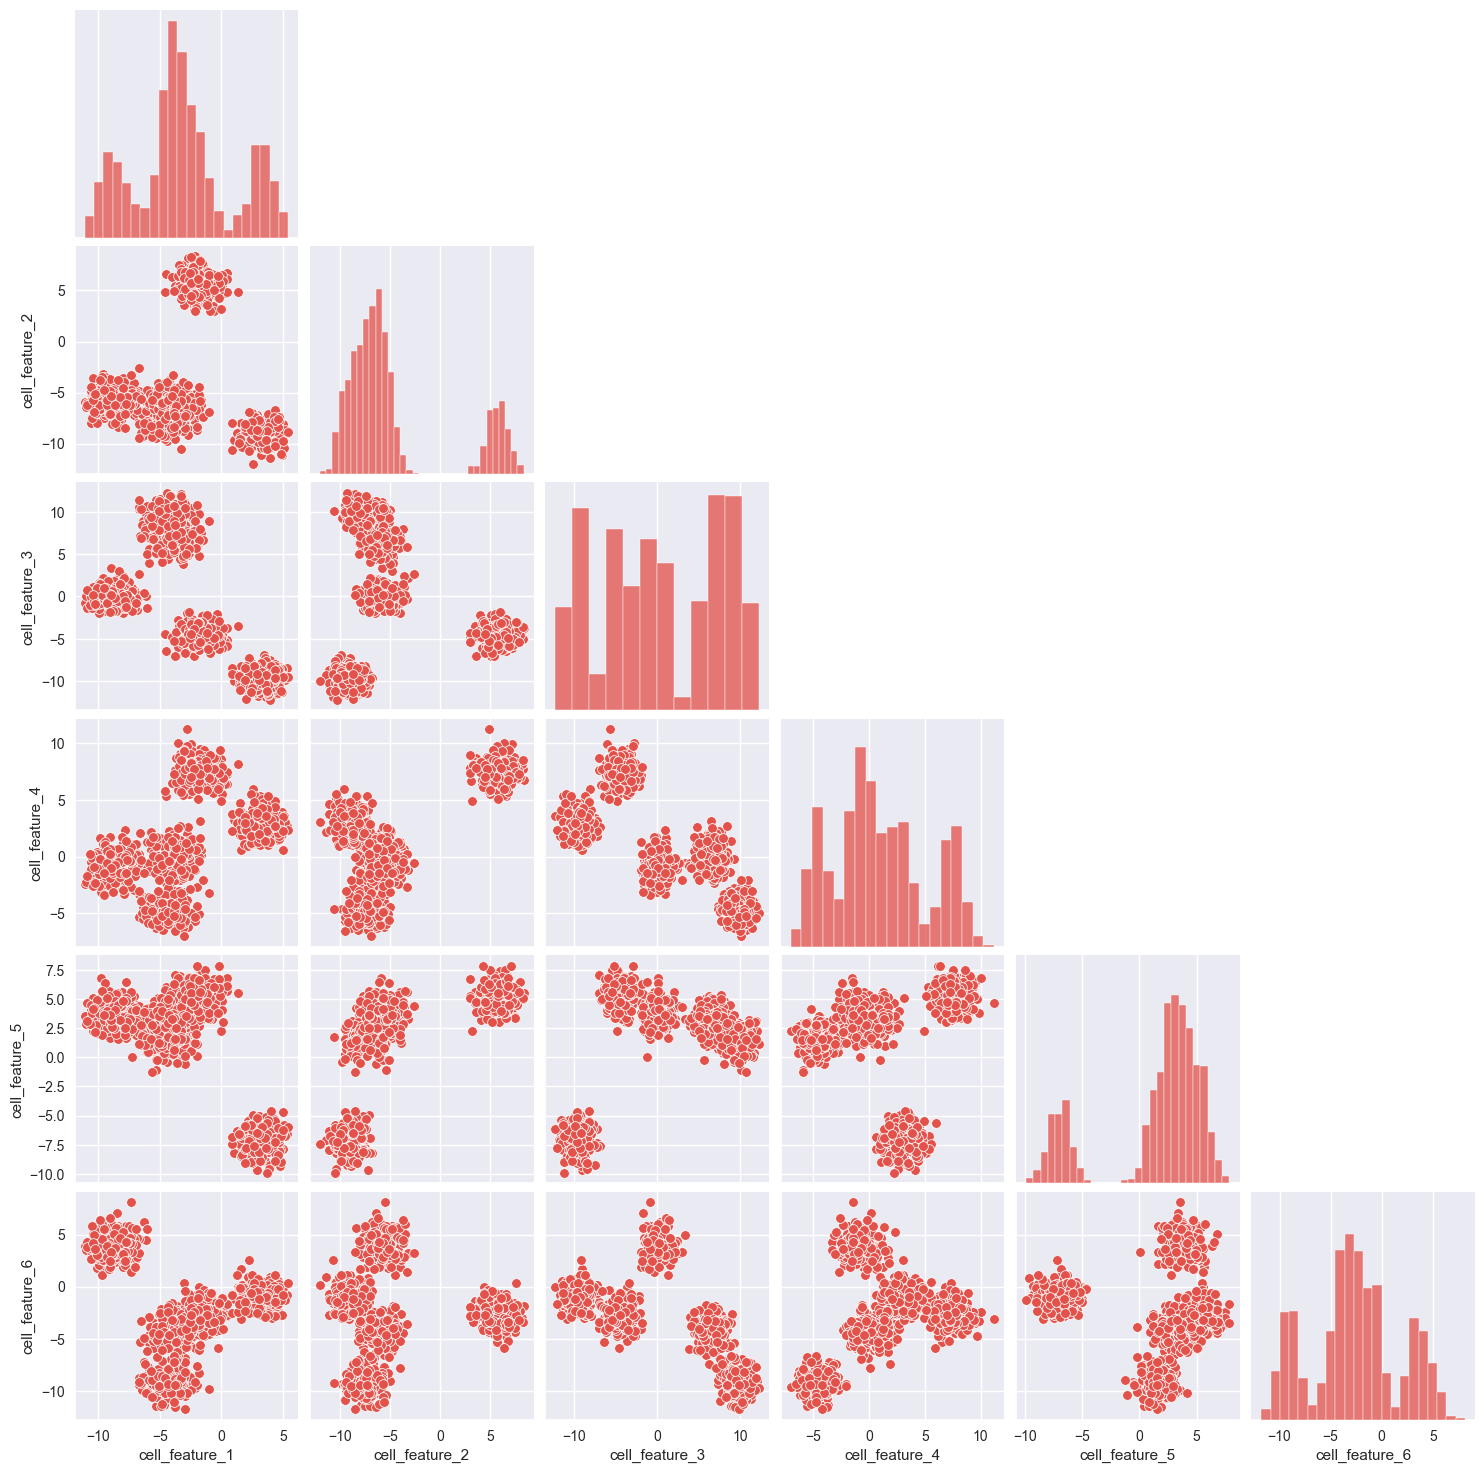

In [3]:
sns.pairplot(data, corner=True)
plt.show()

# Answer

Using seaborn.pairplot to investigate pairwise relationships in a dataframe provides a comprehensive overview of how variables interact with each other, potentially revealing clustering patterns through scatter plots of variable pairs. While pairplots can offer valuable visual cues about the presence of clusters by highlighting areas where data points aggregate, they don't always provide a definitive answer on the exact number of clusters. This limitation arises because pairplots primarily reveal linear relationships and may not capture complex, multi-dimensional clustering patterns effectively. Moreover, the subjective nature of visual interpretation can lead to different conclusions about the number of clusters, especially in dense or overlapping data regions. For a more objective and quantitative assessment of clustering, techniques such as silhouette analysis, the elbow method, or other cluster validation metrics should be employed alongside or instead of pairplot visualizations.


### Q1.3 - <span style="color:red">[15]</span> - Cluster the dataframe `data` using `KMeans` with `k` in $[2, 3, 4, 5, 6]$. Plot inertia versus `k` as well as silhouette score versus `k` in separate plot windows. Solely relying on these two plots, what are the best **two** values that you would conclude for `k`? Why?

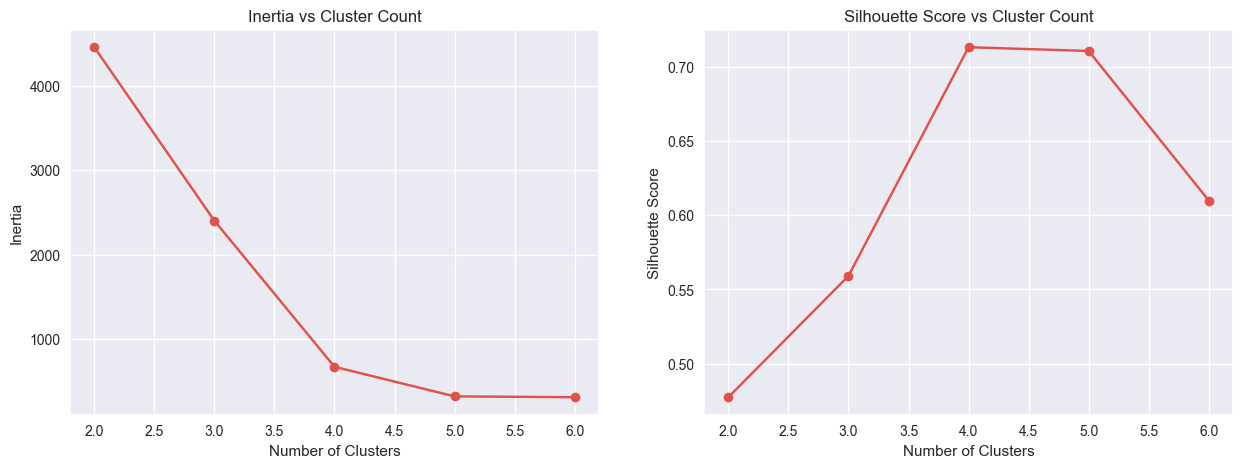

In [4]:
# scale data
scaler = prep.StandardScaler()

for feature in data.columns:
    data[[feature]] = scaler.fit_transform(data[[feature]])

cluster_sizes = [2, 3, 4, 5, 6]  # List of cluster sizes to evaluate

# Fit KMeans models and calculate inertia and silhouette score for each model
kmeansCluster = [
    KMeans(n_clusters=k, random_state=seed).fit(data) for k in cluster_sizes
]

inertias = [model.inertia_ for model in kmeansCluster]

silhouette_scores = [
    metrics.silhouette_score(data, model.labels_) for model in kmeansCluster
]

# Plotting Inertia and Silhouette Score for each cluster size
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(cluster_sizes, inertias, marker="o")
ax[0].set_title("Inertia vs Cluster Count")
ax[0].set_xlabel("Number of Clusters")
ax[0].set_ylabel("Inertia")

ax[1].plot(cluster_sizes, silhouette_scores, marker="o")
ax[1].set_title("Silhouette Score vs Cluster Count")
ax[1].set_xlabel("Number of Clusters")
ax[1].set_ylabel("Silhouette Score")

plt.show()

# Answer

Based on these two plots we can conclude that clustering with k=4 or k=5 would be our best option. This is because at 4 and 5 clusters inertia scores plateau and the silhouette scores are highest.


### Q1.4 - <span style="color:red">[20]</span> - Do the following steps on the dataframe `data`:
1. Plot the silhouette diagrams (*i.e.*, the stacked silhouette scores for clusters members) for the choices of `k` which you concluded in the previous question (*i.e.*, Q1.2).
2. Do a 2-component PCA and plot PC1 against PC2.
3. Do a 2-component t-SNE with a perplexity of 100 and plot the first embedding against the second embedding.
4. Interpret, in writing, the results of the previous 3 steps. What would be your final choice for the number of clusters (`k`)?

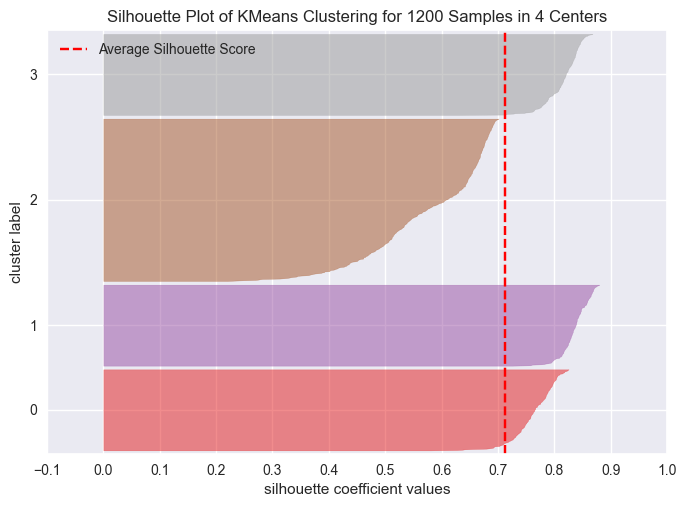

0.7129859572743572


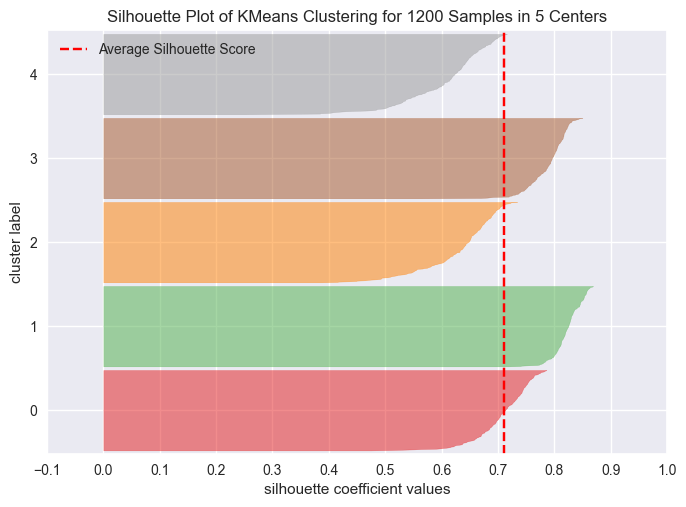

0.7104655289178058


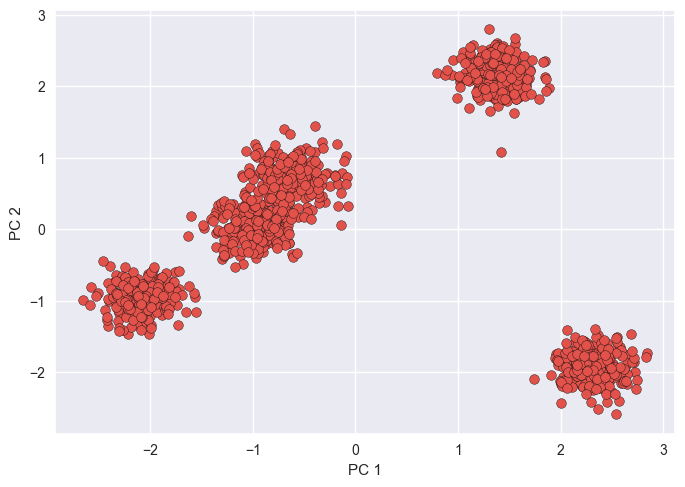

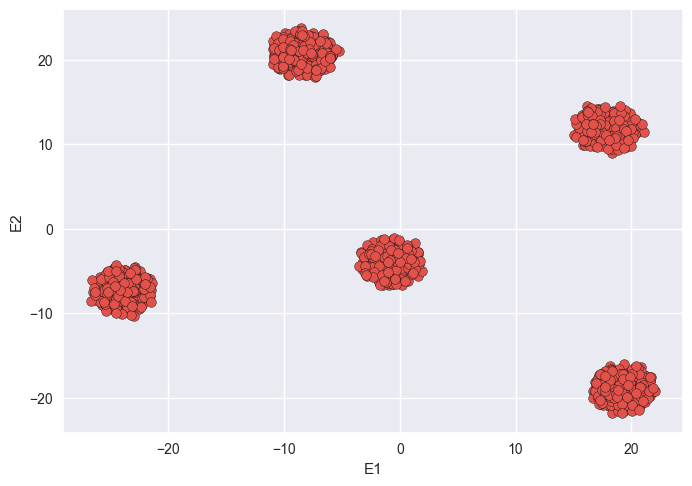

In [5]:
best_clusters = [4, 5]  # best according to inertia and silouhette scores

# Silouette Plots for best clusters
for k in best_clusters:
    kmeans = KMeans(n_clusters=k, random_state=seed)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(data)
    visualizer.show()
    print(metrics.silhouette_score(data, kmeans.labels_))
    plt.show()

# PCA with 2 components
pcaTransformer = PCA(2, random_state=seed)
pcaTransformer.fit(data)
X = pcaTransformer.transform(data)
plt.scatter(X[:, 0], X[:, 1], edgecolor="k")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

# TSNE with 2 components and perplexity 100
tsne = TSNE(n_components=2, perplexity=100.0, random_state=seed, n_jobs=-1)
embedding = tsne.fit_transform(data)
plt.scatter(embedding[:, 0], embedding[:, 1], edgecolor="k")
plt.xlabel("E1")
plt.ylabel("E2")
plt.show()

# Answer

The silhouette plot shows that k=5 is marginally the better choice over k=4 because all clusters of k=5 pass the average silhouette score dashed line while the case is not true for k=4 where one cluster barely does not reach the average score. But generally both are comparable in this analysis.

The PCA shows support for k=4 as we see that there are 4 separated groups of points.

The TSNE analysis shows 5 spherical evenly sized and evenly distributed clusters giving support for k=5.

All these analysis methods point to k=5 clusters being the optimal number for this dataset. This means we can expected 5 types of cell in the data.


### Q1.5 - <span style="color:red">[30]</span> - Now that you have the number of clusters figured out, use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using decision boundaries defined over the t-SNE's first and second embeddings. The decision boundaries that you define could be of any geometric shape (*e.g.*, square) as long as they can perfectly isolate the clusters from each other. Also, plot these:
1.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1, reflecting in a color-coded way, original known cells, unknown cells, and decision boundaries,
2.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1 after updating the cell type of the unknown cells. Use different colors to distinguish the clusters,
3.   scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

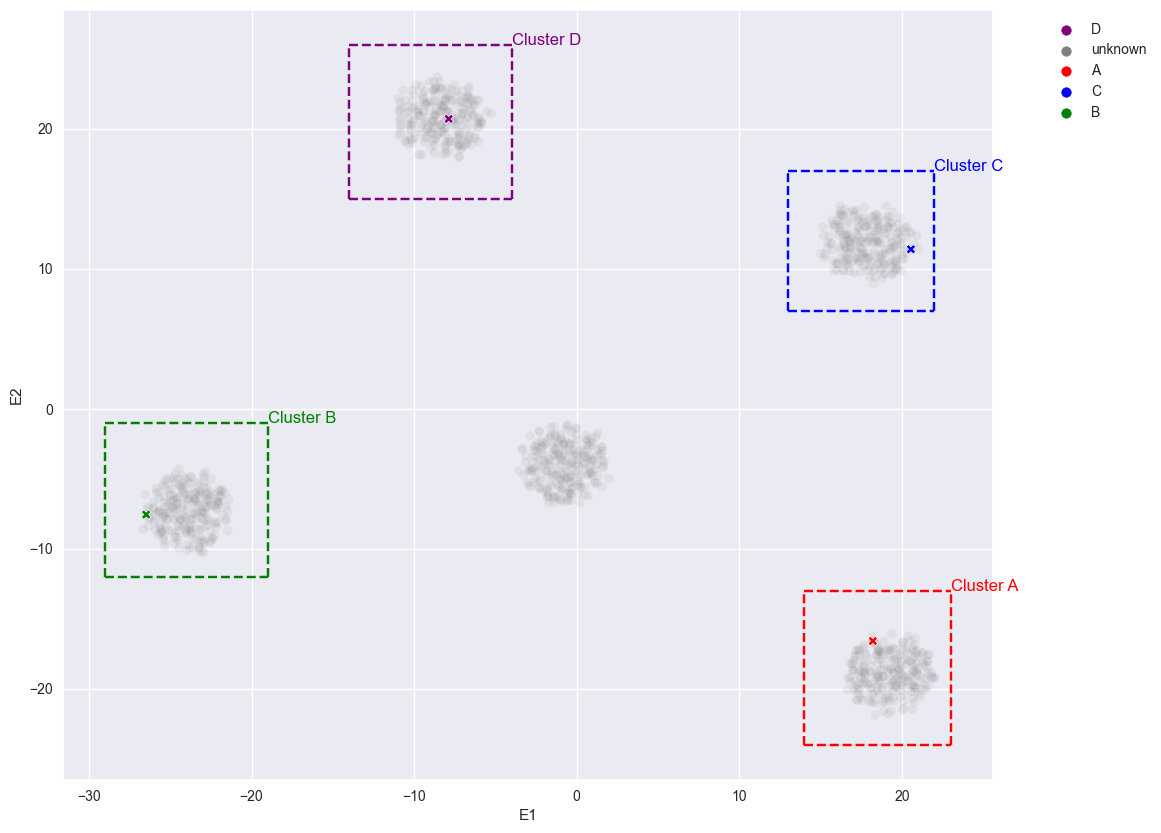

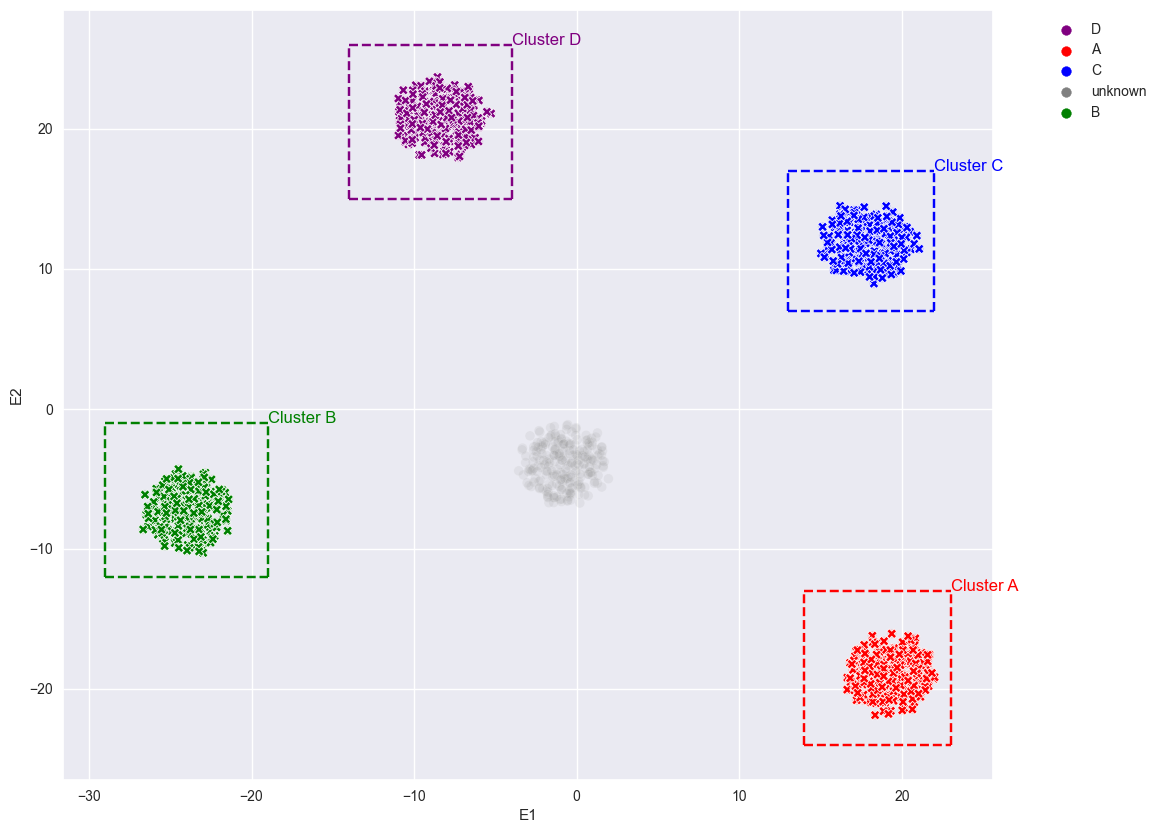

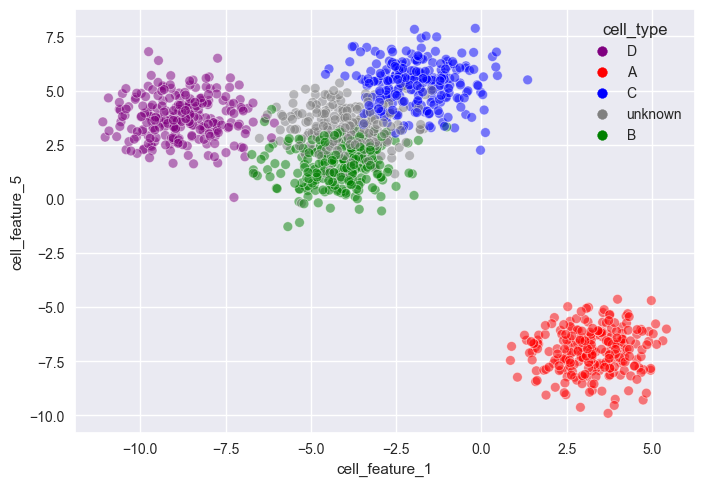

In [6]:
# Define colors for each cell type
cell_type_colors = {
    "A": "red",
    "B": "green",
    "C": "blue",
    "D": "purple",
    "unknown": "grey",
}


# cluster based on x and y limits
def getCluster(embedding, xmin, xmax, ymin, ymax):
    return embedding[
        (embedding[:, 0] >= xmin)
        & (embedding[:, 0] <= xmax)
        & (embedding[:, 1] >= ymin)
        & (embedding[:, 1] <= ymax)
    ]


# Function to draw decision boundaries
def boundaryPlot(xmin, xmax, ymin, ymax, label, color):
    plt.plot([xmin, xmax], [ymin, ymin], color=color, linestyle="--")
    plt.plot([xmin, xmax], [ymax, ymax], color=color, linestyle="--")
    plt.plot([xmin, xmin], [ymin, ymax], color=color, linestyle="--")
    plt.plot([xmax, xmax], [ymin, ymax], color=color, linestyle="--")
    plt.text(xmax, ymax, label, fontsize=12, color=color)


# plot the embedding space before updating cell types based on decision boundaries
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=dfc["cell_type"],
    palette=cell_type_colors,
    legend="full",
    alpha=0.1,
    marker="o",
)
sns.scatterplot(
    x=embedding[dfc["cell_type"] != "unknown", 0],
    y=embedding[dfc["cell_type"] != "unknown", 1],
    hue=dfc["cell_type"][dfc["cell_type"] != "unknown"],
    palette=cell_type_colors,
    legend=False,
    alpha=1,
    marker="X",
)

# Define and plot decision boundaries for each cluster
decision_boundaries = {
    "A": {
        "xmin": 14,
        "xmax": 23,
        "ymin": -24,
        "ymax": -13,
        "color": "red",
        "label": "Cluster A",
    },
    "B": {
        "xmin": -29,
        "xmax": -19,
        "ymin": -12,
        "ymax": -1,
        "color": "green",
        "label": "Cluster B",
    },
    "C": {
        "xmin": 13,
        "xmax": 22,
        "ymin": 7,
        "ymax": 17,
        "color": "blue",
        "label": "Cluster C",
    },
    "D": {
        "xmin": -14,
        "xmax": -4,
        "ymin": 15,
        "ymax": 26,
        "color": "purple",
        "label": "Cluster D",
    },
}

for label, boundary in decision_boundaries.items():
    boundaryPlot(**boundary)

plt.xlabel("E1")
plt.ylabel("E2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Function to label unknown cells based on decision boundaries
def label_unknown_cells(embedding, boundaries, df):
    for i in range(embedding.shape[0]):
        for label, boundary in boundaries.items():
            if (
                embedding[i, 0] >= boundary["xmin"]
                and embedding[i, 0] <= boundary["xmax"]
                and embedding[i, 1] >= boundary["ymin"]
                and embedding[i, 1] <= boundary["ymax"]
            ):
                df.loc[i, "cell_type"] = label
                break


df1 = dfc.copy()
label_unknown_cells(embedding, decision_boundaries, df1)

# Plot the embedding space after labeling unknown cells and coloring them based on their updated cell types
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=df1["cell_type"],
    palette=cell_type_colors,
    legend="full",
    alpha=0.1,
    marker="o",
)
sns.scatterplot(
    x=embedding[df1["cell_type"] != "unknown", 0],
    y=embedding[df1["cell_type"] != "unknown", 1],
    hue=df1["cell_type"][df1["cell_type"] != "unknown"],
    palette=cell_type_colors,
    legend=False,
    alpha=1,
    marker="X",
)


# Plot decision boundaries
for label, boundary in decision_boundaries.items():
    boundaryPlot(**boundary)

plt.xlabel("E1")
plt.ylabel("E2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


# Plot of 'cell_feature_1' vs 'cell_feature_5' with updated cell types
sns.scatterplot(
    x="cell_feature_1",
    y="cell_feature_5",
    hue="cell_type",
    data=df1,
    palette=cell_type_colors,
    alpha=0.5,
)
plt.xlabel("cell_feature_1")
plt.ylabel("cell_feature_5")
plt.show()

### Q1.6 - <span style="color:red">[15]</span> - This question in independent of Q1.5. This time, we want to update the cell type of the unknown cells using a different method. We have the number of clusters figured out in Q1.4 already. Use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using `kmeans.predict()`. Finally, scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

[0, 1, 3, 2]
['D', 'A', 'C', 'B']
Mapping dictionary: {0: 'D', 1: 'unknown', 2: 'B', 3: 'C', 4: 'A'}


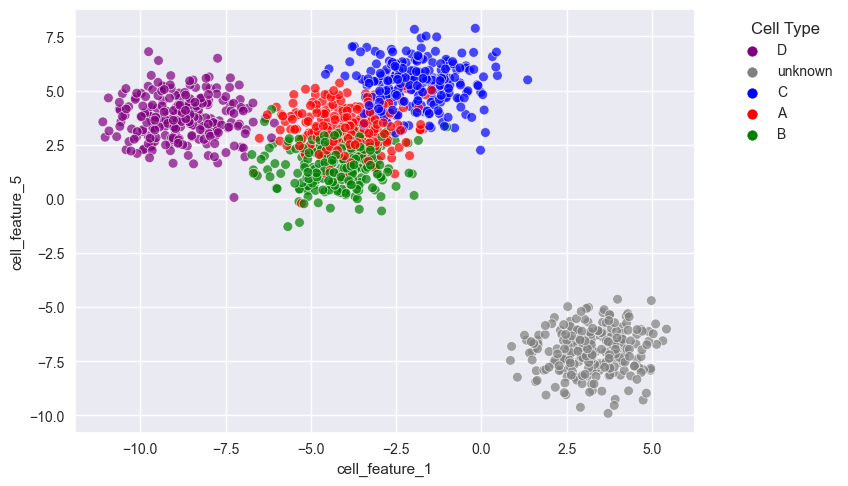

In [7]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=seed)
kmeans.fit(data)

df2 = dfc.copy()
df2["cell_type"] = kmeans.predict(data)

print(df2.iloc[dfc[dfc["cell_type"] != "unknown"]["cell_type"].index, -1].to_list())
print(dfc[dfc["cell_type"] != "unknown"]["cell_type"].to_list())

mapping = {0: "D", 1: "unknown", 2: "B", 3: "C", 4: "A"}
print(f"Mapping dictionary: {mapping}")

df2["cell_type"] = df2["cell_type"].map(mapping)

sns.scatterplot(
    data=df2,
    x="cell_feature_1",
    y="cell_feature_5",
    hue="cell_type",
    palette=cell_type_colors,
    alpha=0.7,
)
plt.xlabel("cell_feature_1")
plt.ylabel("cell_feature_5")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", title="Cell Type")
plt.show()